In [96]:
#Import a couple of libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import math

In [16]:
#Generate a random list of numbers
x = np.linspace(0, 3, 1000) #This is the x axis
y = np.random.uniform(0, 3, 1000) #This is a random y axis

In [21]:
def testFunc():
    #I'm pretty sure this isn't what is expected, cause there is no function that fits this data at all
    """fig = plt.figure()
    fig.set_figwidth(28)
    fig.set_figheight(25)
    plt.scatter(x, y, s=50, color="orange")
    plt.axis([0, 4, 0, 4])
    plt.show()"""

In [123]:
#Using a function to generate an ideal data set
f = lambda x: (x-1)*np.exp(x)

#Ideal function graph
x = np.linspace(0, 2, 1000)
y = f(x)

#Generate random data here
#X will remain the same
rdx = list()
i = 0
while i < len(x):
    rdx.append(x[i])
    i += np.random.randint(low=1, high=50, size=1)[0]
    
npx = np.array(rdx)
print(npx)
yrd = f(npx) + np.random.rand(len(npx))

[0.         0.09009009 0.15615616 0.21421421 0.28628629 0.33033033
 0.35235235 0.41641642 0.45045045 0.52452452 0.55655656 0.56456456
 0.57257257 0.65265265 0.71871872 0.74874875 0.76476476 0.78478478
 0.79279279 0.81881882 0.87687688 0.95495495 1.04304304 1.04504505
 1.06906907 1.0950951  1.15115115 1.15915916 1.17117117 1.23723724
 1.26126126 1.35335335 1.35935936 1.43543544 1.45545546 1.51551552
 1.55355355 1.61761762 1.63563564 1.71171171 1.78978979 1.83583584
 1.83783784 1.85585586 1.9019019  1.90590591 1.96196196 1.98198198
 1.98398398]


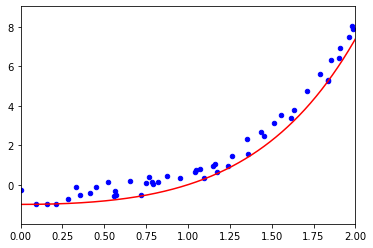

In [142]:
fig = plt.figure()
plt.plot(x, y, "r-")
plt.scatter(npx, yrd, color="b", s=20)
plt.axis([0, 2, min(yrd) - 1, max(yrd) + 1])
plt.show()

In [125]:
#Attempt a polyfitting with just numpy's polyfit function

In [126]:
#Define the different polynomials here
fit2 = np.polyfit(npx, yrd, 2) #Magnitude 2

val2 = np.polyval(fit2, npx)
#------
fit4 = np.polyfit(npx, yrd, 4) #Magnitude 2

val4 = np.polyval(fit4, npx)
#------
fit6 = np.polyfit(npx, yrd, 6) #Magnitude 2

val6 = np.polyval(fit6, npx)
#------
fit8 = np.polyfit(npx, yrd, 8) #Magnitude 2

val8 = np.polyval(fit8, npx)
#------
fit10 = np.polyfit(npx, yrd, 10) #Magnitude 2

val10 = np.polyval(fit10, npx)

In [133]:
#Define a chi-square fit on the data, it does not contain the errors on the data, so this might not be incredibly accurate, 
#but it kinda defines a trend line of the data
def chiSquare(yrd, vals):
    sum = 0
    for i in range(0, len(yrd)):
        sum += (yrd[i] - vals[i])**2
        
    return sum

Chi-Square: 8.018618486392173


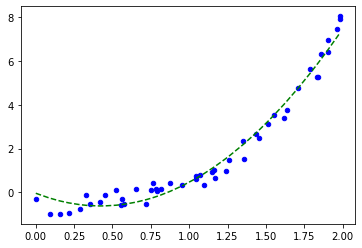

In [134]:
#Graph the individual units of data with the estimated trendline
plt.scatter(npx, yrd, color="b", s=20)
plt.plot(npx, val2, "g--")
chi = chiSquare(yrd, val2)
print("Chi-Square: " + str(chi))
plt.show()

Chi-Square: 4.060528009924884


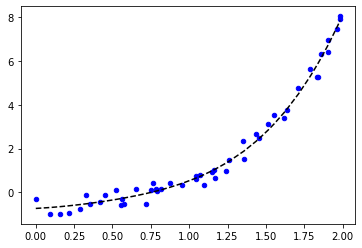

In [135]:
#Graph the individual units of data with the estimated trendline
plt.scatter(npx, yrd, color="b", s=20)
plt.plot(npx, val4, "k--")
chi = chiSquare(yrd, val4)
print("Chi-Square: " + str(chi))
plt.show()

Chi-Square: 3.350810606963957


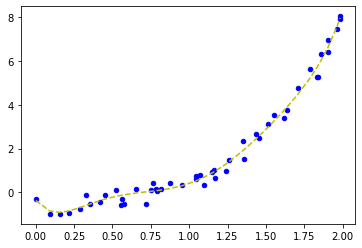

In [140]:
#Graph the individual units of data with the estimated trendline
plt.scatter(npx, yrd, color="b", s=20)
plt.plot(npx, val6, "y--")
chi = chiSquare(yrd, val6)
print("Chi-Square: " + str(chi))
plt.show()

Chi-Square: 3.21155534520918


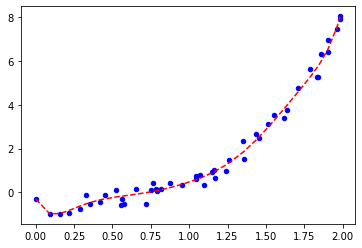

In [137]:
#Graph the individual units of data with the estimated trendline
plt.scatter(npx, yrd, color="b", s=20)
plt.plot(npx, val8, "r--")
chi = chiSquare(yrd, val8)
print("Chi-Square: " + str(chi))
plt.show()

Chi-Square: 3.0782106307423462


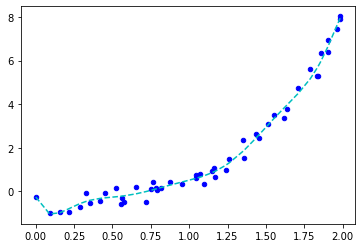

In [138]:
#Graph the individual units of data with the estimated trendline
plt.scatter(npx, yrd, color="b", s=20)
plt.plot(npx, val10, "c--")
chi = chiSquare(yrd, val10)
print("Chi-Square: " + str(chi))
plt.show()

In [139]:
#What this shows is that as the degree of the polynomial increases, there is more of a likely hood that the graph curve
#will fit the created data. This is shown with a chi-square value (not weighted, because it's not divided by the errors)
#on each created curve, and it shows that the value with the least chi-square is of degree 10.